In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nassimsfaxi/observation-de-maladie")

print("Path to dataset files:", path)

100%|██████████| 164k/164k [00:00<00:00, 692kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nassimsfaxi/observation-de-maladie/versions/2


**Importing** **Libraries**

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer # Added SimpleImputer
plt.style.use('ggplot')

**Importing** **Data**

In [4]:
data=pd.read_csv('/content/maladie_observations.csv')

**Exploratory** **Data** **Analysis**

In [5]:
data.sample(5)

,temperature,pouls,oxygene,glycemie,tension,label
5603,36.705374,57.0,98.196011,106.975025,94,0
2626,38.228280,109.0,94.404225,74.710869,94,1
1474,36.111766,70.0,99.938879,70.284459,125,0
1489,38.144459,110.0,97.342817,77.318977,106,1
3282,38.454359,97.0,92.436025,85.790599,124,1


In [6]:
data.shape

(5725, 6)

In [7]:
data.groupby('label').label.value_counts()

,count
label,
0,2551
1,3174


<Axes: >

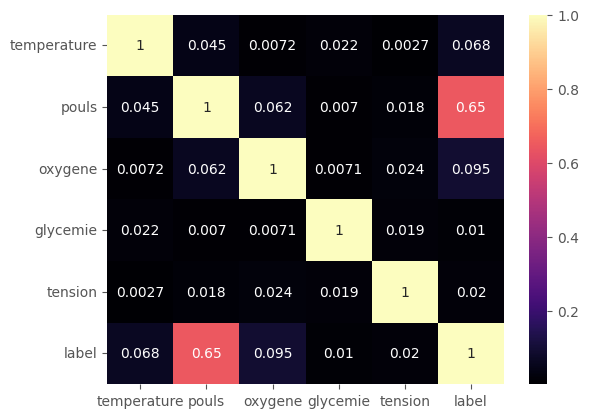

In [8]:
sns.heatmap(data.corr().abs(),cmap='magma',annot=True)


In [9]:
data.shape

(5725, 6)

In [10]:
data.isna().sum()

,0
temperature,19
pouls,23
oxygene,10
glycemie,0
tension,0
label,0


In [11]:
data.temperature.describe()

,temperature
count,5706.000000
mean,38.518146
std,14.472846
min,36.000615
25%,36.854110
50%,38.179327
75%,39.089746
max,522.520254


In [12]:
median_temp=data[data['temperature']<100].temperature.median()
data['temperature']=data['temperature'].apply(lambda x: median_temp if x >100 else x)

In [13]:
data.temperature.describe()

,temperature
count,5706.000000
mean,37.993341
std,1.228840
min,36.000615
25%,36.854110
50%,38.176964
75%,39.085976
max,39.999698


In [14]:
mean_temp = data['temperature'].mean()
data['temperature'] = data['temperature'].fillna(mean_temp)

In [15]:
data.sample(5)

,temperature,pouls,oxygene,glycemie,tension,label
2380,38.713446,94.0,97.013430,89.665919,126,1
3219,36.227989,52.0,98.069965,111.711666,127,0
2727,39.222927,108.0,93.153859,101.816596,125,1
4232,39.749212,110.0,97.487699,115.394328,103,1
896,38.225161,95.0,92.721483,78.417796,106,1


/tmp/ipython-input-404202582.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x='label',y='temperature',palette=['red','blue'])


<Axes: xlabel='label', ylabel='temperature'>

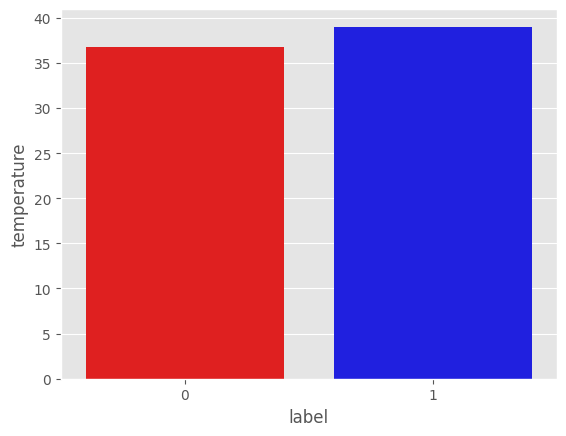

In [16]:
sns.barplot(data,x='label',y='temperature',palette=['red','blue'])

<Axes: xlabel='label', ylabel='temperature'>

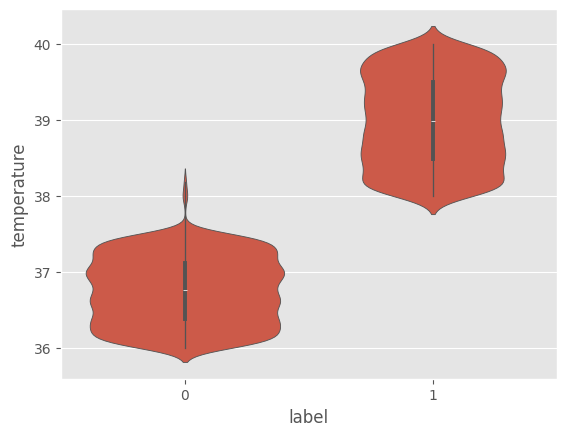

In [17]:
sns.violinplot(data,x='label',y='temperature')

/tmp/ipython-input-4006662737.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x='label',y='pouls',palette=['yellow','orange'])


<Axes: xlabel='label', ylabel='pouls'>

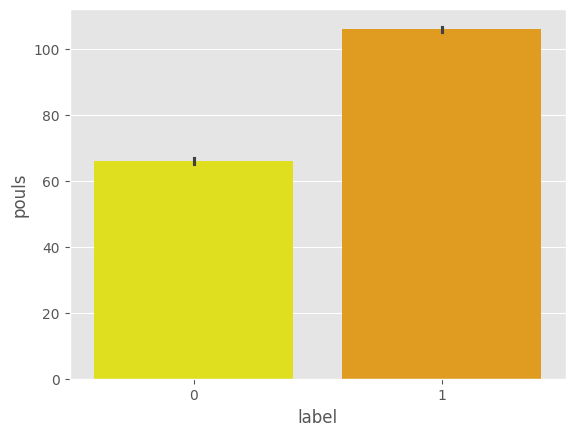

In [18]:
sns.barplot(data,x='label',y='pouls',palette=['yellow','orange'])

<Axes: xlabel='temperature', ylabel='pouls'>

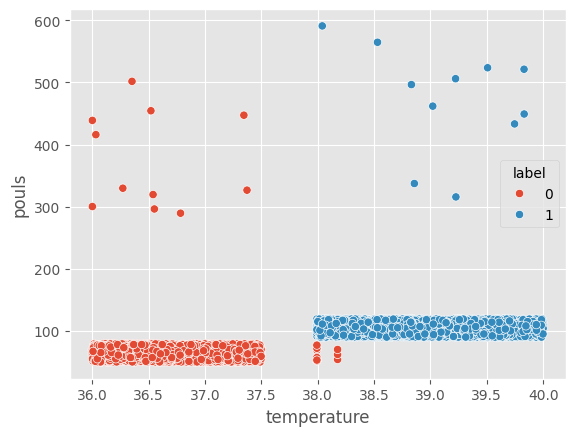

In [19]:
sns.scatterplot( data,x='temperature', y='pouls', hue='label')

<Axes: xlabel='temperature', ylabel='oxygene'>

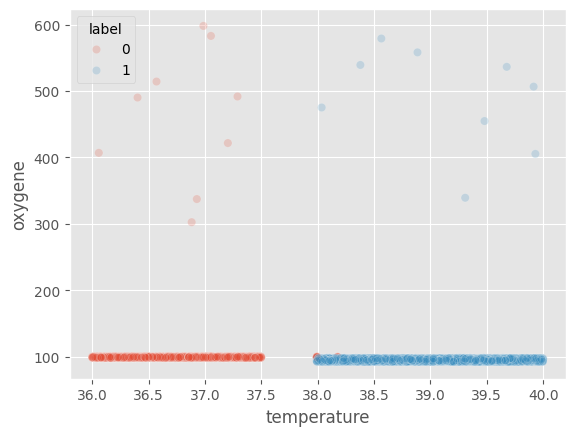

In [21]:
sns.scatterplot(data,x='temperature',y='oxygene',hue='label',alpha=0.2)

/tmp/ipython-input-4241416109.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x='label',y='oxygene',palette=['violet','cyan'])


<Axes: xlabel='label', ylabel='oxygene'>

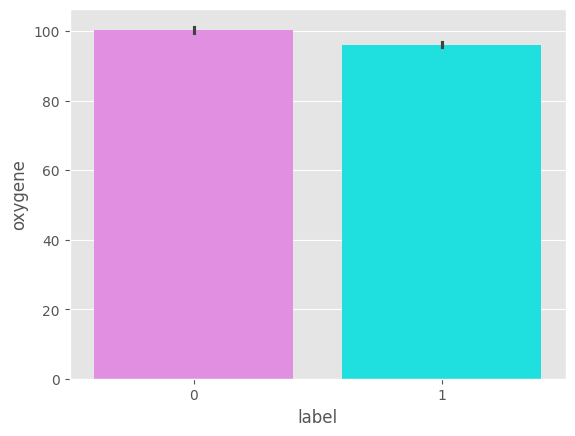

In [22]:
sns.barplot(data,x='label',y='oxygene',palette=['violet','cyan'])

**Train-Test-Split**


In [23]:
Y=data['label']
X=data.drop(columns='label')

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=75)

**Model Training**

In [33]:
# Identify columns with missing values that need imputation
missing_cols = ['pouls', 'oxygene'] # temperature was already handled earlier

# Create an imputer that fills missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform both X_train and X_test
X_train[missing_cols] = imputer.fit_transform(X_train[missing_cols])
X_test[missing_cols] = imputer.transform(X_test[missing_cols])

# Verify no NaNs remain in the relevant columns
# print('NaNs in X_train after imputation:\n', X_train[missing_cols].isna().sum())
# print('NaNs in X_test after imputation:\n', X_test[missing_cols].isna().sum())

model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [29]:
y_pred=model.predict(X_test)

**Model Evaluation**

In [30]:
accuracy_score(Y_test,y_pred)

0.9956331877729258

<Axes: >

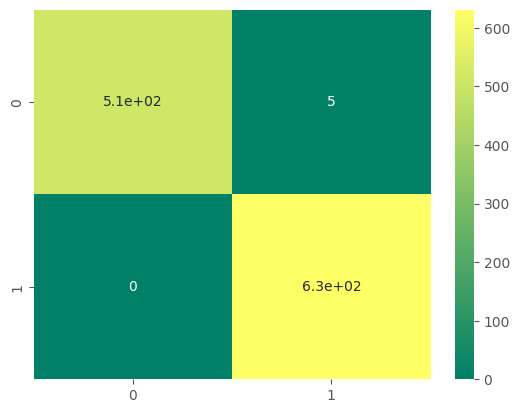

In [31]:
sns.heatmap(confusion_matrix(Y_test,y_pred),cmap='summer',annot=True)